In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading and Preprocessing Data

In [2]:
df = pd.read_csv('Sentiments.csv')

df

,comment,sentiment
0,کس میدونه چه جوری از این ها میشه شکایت کرد لطف...,Negative
1,اف بر شهرداری که درخت را وسط میدان انداخته. طر...,Negative
2,خیلی جای بکری هس حتما یه سر برید👌,Positive
3,آب بسیار کثیف است، متراژ هم کم,Negative
4,افتضاح چون یه شماره تماس نداره خیرسرش,Negative
...,...,...
2538,اصلا کیفیت نداره از سر مجبوری اومدیم اتاق کثیف...,Negative
2539,بسیار عالی بدون سردرد,Positive
2540,برای زیارت و استراحتی کوتاه خوبه در ضمن کتاب ف...,Positive
2541,جای خوبی نیست .یه دونه کافی شاپ امیر شکلات بود...,Negative


**Checking for Missing and Null Values**

In [3]:
label_counts = df['sentiment'].value_counts()

label_counts

sentiment
Negative    1159
Positive     938
Neutral      446
Name: count, dtype: int64

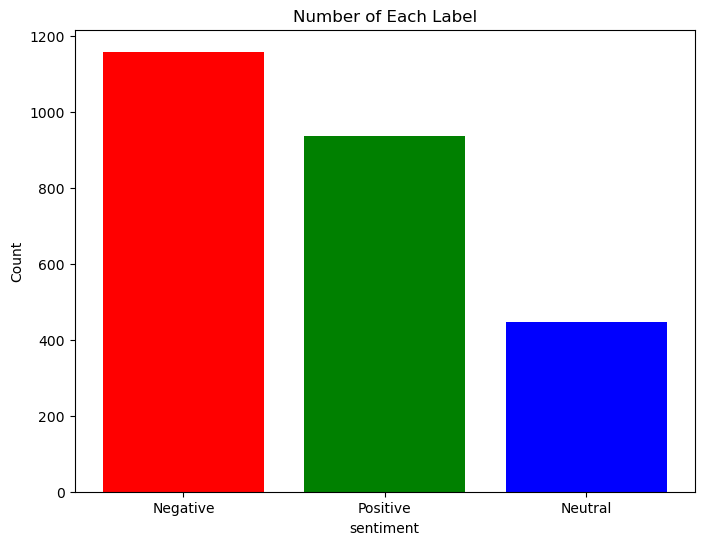

In [4]:
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values, color=['red', 'green' , 'blue'])
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.title('Number of Each Label')
plt.show()

In [5]:
# Check for missing values
missing_values = df.isnull().sum()

missing_values

comment      0
sentiment    0
dtype: int64

In [6]:
blanks = []

for i,email,label in df.itertuples():  # iterate over the DataFrame
    if email.isspace():         # test 'comment' for whitespace
        blanks.append(i)     # add matching index numbers to the list

print(len(blanks),"   |    ", 'blanks: ', blanks , )

0    |     blanks:  []


**Cleaning Text**

In [7]:
import hazm
stopwords = hazm.stopwords_list()
lemmatizer = hazm.Lemmatizer()
normalizer = hazm.Normalizer()

ModuleNotFoundError: No module named 'hazm'

In [44]:
print(len(stopwords))

stopwords[0:10]

389


['آخرین',
 'آقای',
 'آمد',
 'آمده',
 'آمده_است',
 'آن',
 'آنان',
 'آنجا',
 'آنها',
 'آنچه']

In [48]:
test = "سلام میکنم دوستان عزیز به خصوص آقای محمدی و آقای محمدیان"
clean = normalizer.normalize(test)

clean

'سلام می\u200cکنم دوستان عزیز به خصوص آقای محمدی و آقای محمدیان'

In [49]:
def preprocess_text(messy_string):
    assert(type(messy_string) == str)

    # Normalize, tokenize, remove stopwords, lemmatize, and rejoin
    cleaned = ' '.join([
        lemmatizer.lemmatize(word)
        for word in normalizer.normalize(messy_string).split()
        if word not in stopwords
    ])

    return cleaned


In [50]:
df['comment'] = df['comment'].apply(preprocess_text)

df.head()

,comment,sentiment
0,کس میدونه جور میشه شکایت لطفا نوشت#نویس مسولیت...,Negative
1,اف شهردار درخت وسط میدان انداخته. طراح بد,Negative
2,بکر هس حتما یه سر برید👌,Positive
3,آب کثیف است، متراژ,Negative
4,افتضاح یه شماره تماس نداره خیرسرش,Negative


# Preprocessing Data

In [51]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Define the pipeline with a more descriptive name
text_processing_pipeline = Pipeline([
    ('Vectorize', CountVectorizer()),
    ('TF-IDF', TfidfTransformer())
])

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["comment"], df["sentiment"], test_size=0.2, random_state=42)

In [53]:
X_train = text_processing_pipeline.fit_transform(X_train)
X_test = text_processing_pipeline.transform(X_test)

# Training Models

In [54]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [55]:
# Define a dictionary of classifiers for easier referencing and potential scalability
classifiers = {
    "SVC": SVC(kernel='linear'),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "MultinomialNB": MultinomialNB()
}

# Iterate over each classifier and print report
for classifier_name, classifier_obj in classifiers.items():
    # Fit the model
    classifier_obj.fit(X_train, y_train)
        
    # Make predictions
    y_pred = classifier_obj.predict(X_test)
        
    # Generate classification report
    report = classification_report(y_test, y_pred)
        
    # Print the classification report
    print(f'Classification report for {classifier_name}: ')
    print(report)
    print("--------------------------------------------")

Classification report for SVC: 
              precision    recall  f1-score   support

    Negative       0.79      0.84      0.81       248
     Neutral       0.53      0.43      0.48        72
    Positive       0.80      0.80      0.80       189

    accuracy                           0.77       509
   macro avg       0.71      0.69      0.70       509
weighted avg       0.76      0.77      0.76       509

--------------------------------------------
Classification report for RandomForest: 
              precision    recall  f1-score   support

    Negative       0.84      0.77      0.81       248
     Neutral       0.63      0.43      0.51        72
    Positive       0.70      0.86      0.77       189

    accuracy                           0.76       509
   macro avg       0.73      0.69      0.70       509
weighted avg       0.76      0.76      0.75       509

--------------------------------------------
Classification report for LogisticRegression: 
              precision    r

# Testing

In [83]:
df.iloc[1600]

comment      فضا وشلوغ بلیط ۲ ساعت ۹۰ هزار تومان مبلغ هست ۱...
sentiment                                             Negative
Name: 1600, dtype: object

In [84]:
# Test the model with a custom email

#comment = preprocess_text("من این فیلم رو دوست نداشتم و خیلی بدم اومد ")
comment = df.iloc[1600]['comment']

custom_comment = text_processing_pipeline.transform([comment])

print(classifiers["SVC"].predict(custom_comment))

['Negative']
